<a href="https://colab.research.google.com/github/amalazimroshan/controlnode/blob/main/get_bearings_from_nearest_node_osmnx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip -q install osmnx

In [ ]:
!pip show osmnx

Name: osmnx
Version: 2.0.0
Summary: Download, model, analyze, and visualize street networks and other geospatial features from OpenStreetMap
Home-page: 
Author: 
Author-email: Geoff Boeing <boeing@usc.edu>
License: MIT License
Location: /usr/local/lib/python3.10/dist-packages
Requires: geopandas, networkx, numpy, pandas, requests, shapely
Required-by: 


In [ ]:
import osmnx as ox
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
latitude,longitude = 40.741572,-73.989563

In [ ]:
graph = ox.graph_from_point(
    (latitude,longitude),
    dist=500,
    dist_type="bbox",
    network_type="drive",
)

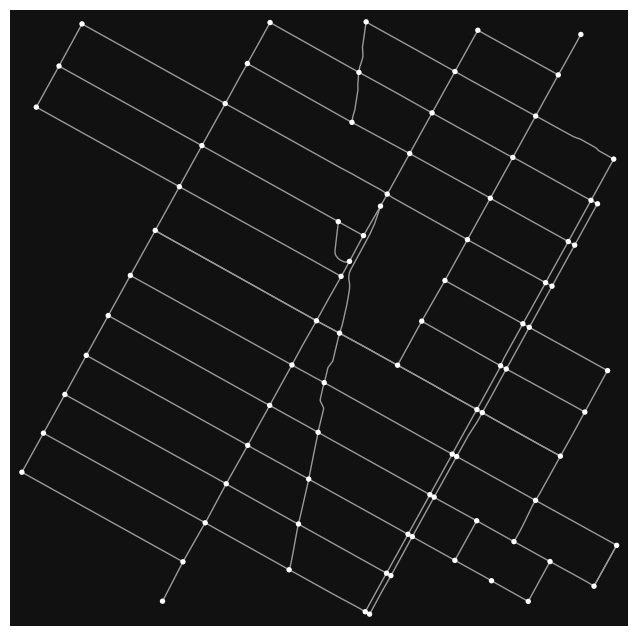

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [ ]:
ox.plot_graph(graph)

In [ ]:
nodes, edges = ox.graph_to_gdfs(graph)

In [ ]:
print(edges.index.names)
print(edges.columns)

['u', 'v', 'key']
Index(['osmid', 'highway', 'lanes', 'maxspeed', 'name', 'oneway', 'width',
       'reversed', 'length', 'geometry'],
      dtype='object')


In [ ]:
# get nearest node of the gps coordinates
# where light is placed.
geo_coordinates = (40.741572,-73.989563)
nearest_node = ox.distance.nearest_nodes(
    graph,
    geo_coordinates[1],
    geo_coordinates[0],
)
nearest_node

42437881

In [ ]:
nodes.loc[42434268]

,42434268
y,40.740886
x,-73.990083
street_count,4
highway,traffic_signals
geometry,POINT (-73.9900833 40.7408858)


In [ ]:
# nodes.loc[42453624]

In [ ]:
def plot_line(angle, length, origin=(0, 0)):
  """
  Plots a line given its angle and length.

  Args:
    angle: The angle of the line in degrees.
    length: The length of the line.
    origin: The starting point of the line as a tuple (x, y).
  """

  # Convert angle to radians
  angle_rad = np.radians(angle)

  # Calculate end point of the line
  x1, y1 = origin
  x2 = x1 + length * np.cos(angle_rad)
  y2 = y1 + length * np.sin(angle_rad)

  # Plot the line
  plt.plot([x1, x2], [y1, y2])

In [ ]:
edges_from_u = edges[
    edges.index.get_level_values('u') == nearest_node
]
edges_from_u

osmid    highway   lanes  \
u        v        key                                                           
42437881 42428201 0                                5671620  secondary       5   
         42434268 0                  [889114531, 34080508]  secondary       3   
         42430271 0    [1088320656, 465101198, 1088320655]  secondary  [4, 6]   

                      maxspeed              name  oneway width  reversed  \
u        v        key                                                      
42437881 42428201 0     25 mph  East 23rd Street   False   NaN     False   
         42434268 0     25 mph        5th Avenue    True   NaN     False   
         42430271 0     25 mph  West 23rd Street   False   NaN      True   

                           length  \
u        v        key               
42437881 42428201 0     43.854334   
         42434268 0     84.538333   
         42430271 0    309.194163   

                                                                geometry  
u        v        key                                                     
42437881 42428201 0    LINESTRING (-73.9896 40.74155, -73.98948 40.74...  
         42434268 0    LINESTRING (-73.9896 40.74155, -73.98967 40.74...  
         42430271 0    LINESTRING (-73.9896 40.74155, -73.98971 40.74...

In [ ]:
edges_to_v = edges[
    edges.index.get_level_values('v') == nearest_node
]
edges_to_v

,,,osmid,highway,lanes,maxspeed,name,oneway,width,reversed,length,geometry
u,v,key,,,,,,,,,,
42428201,42437881,0,5671620,secondary,5,25 mph,East 23rd Street,False,NaN,True,43.854334,"LINESTRING (-73.98914 40.74136, -73.98921 40.7..."
42428206,42437881,0,"[895348610, 788602261]",secondary,3,25 mph,5th Avenue,True,NaN,False,84.961670,"LINESTRING (-73.98911 40.74222, -73.98915 40.7..."
42430271,42437881,0,"[1088320656, 465101198, 1088320655]",secondary,"[6, 4]",25 mph,West 23rd Street,False,NaN,False,309.194163,"LINESTRING (-73.9928 40.74291, -73.99267 40.74..."


In [ ]:
neighbors = set()
connected_edges = pd.concat([edges_from_u , edges_to_v])
for _, edge in connected_edges.iterrows():
  if(edge.name[0] == nearest_node):
    # if(edge.oneway):
    neighbors.add(edge.name[1])
  elif(edge.name[1] == nearest_node):
  # else:
    neighbors.add(edge.name[0])

In [ ]:
connected_edges

osmid    highway   lanes  \
u        v        key                                                           
42437881 42428201 0                                5671620  secondary       5   
         42434268 0                  [889114531, 34080508]  secondary       3   
         42430271 0    [1088320656, 465101198, 1088320655]  secondary  [4, 6]   
42428201 42437881 0                                5671620  secondary       5   
42428206 42437881 0                 [895348610, 788602261]  secondary       3   
42430271 42437881 0    [1088320656, 465101198, 1088320655]  secondary  [6, 4]   

                      maxspeed              name  oneway width  reversed  \
u        v        key                                                      
42437881 42428201 0     25 mph  East 23rd Street   False   NaN     False   
         42434268 0     25 mph        5th Avenue    True   NaN     False   
         42430271 0     25 mph  West 23rd Street   False   NaN      True   
42428201 42437881 0     25 mph  East 23rd Street   False   NaN      True   
42428206 42437881 0     25 mph        5th Avenue    True   NaN     False   
42430271 42437881 0     25 mph  West 23rd Street   False   NaN     False   

                           length  \
u        v        key               
42437881 42428201 0     43.854334   
         42434268 0     84.538333   
         42430271 0    309.194163   
42428201 42437881 0     43.854334   
42428206 42437881 0     84.961670   
42430271 42437881 0    309.194163   

                                                                geometry  
u        v        key                                                     
42437881 42428201 0    LINESTRING (-73.9896 40.74155, -73.98948 40.74...  
         42434268 0    LINESTRING (-73.9896 40.74155, -73.98967 40.74...  
         42430271 0    LINESTRING (-73.9896 40.74155, -73.98971 40.74...  
42428201 42437881 0    LINESTRING (-73.98914 40.74136, -73.98921 40.7...  
42428206 42437881 0    LINESTRING (-73.98911 40.74222, -73.98915 40.7...  
42430271 42437881 0    LINESTRING (-73.9928 40.74291, -73.99267 40.74...

In [ ]:
neighbors

{42428201, 42428206, 42430271, 42434268}

In [ ]:
# neighbors = graph.neighbors(nearest_node)
# neighbors

In [ ]:
def get_bearing(lat1,lon1,lat2,lon2):


    dy = lat2 - lat1
    dx = lon2 - lon1

    bearing = math.degrees(math.atan2(dy, dx))
    # Normalize to 0-360
    return (bearing + 360) % 360

42428201 40.7413643 -73.9891378
337.89993150201286
42434268 40.7408858 -73.9900833
233.79214632443842
42428206 40.7422186 -73.9891071
53.766619062606594
42430271 40.7429103 -73.9927979
156.9874326862605


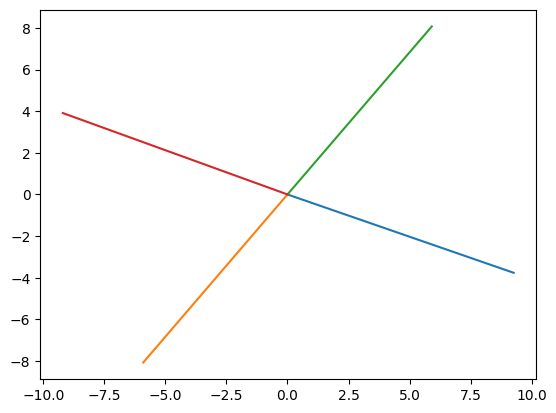

In [ ]:
routes = list()
directions = list()
for neighbor in neighbors:
  print(neighbor, end=" ")
  routes.append([nearest_node, neighbor])
  node1_lat, node1_lon  = graph.nodes[nearest_node]['y'], graph.nodes[nearest_node]['x']
  node2_lat, node2_lon   = graph.nodes[neighbor]['y'], graph.nodes[neighbor]['x']
  print(node2_lat, node2_lon)
  bearing = get_bearing(node1_lat, node1_lon, node2_lat, node2_lon)
  directions.append(bearing)
  plot_line(bearing,10)
  print(bearing)

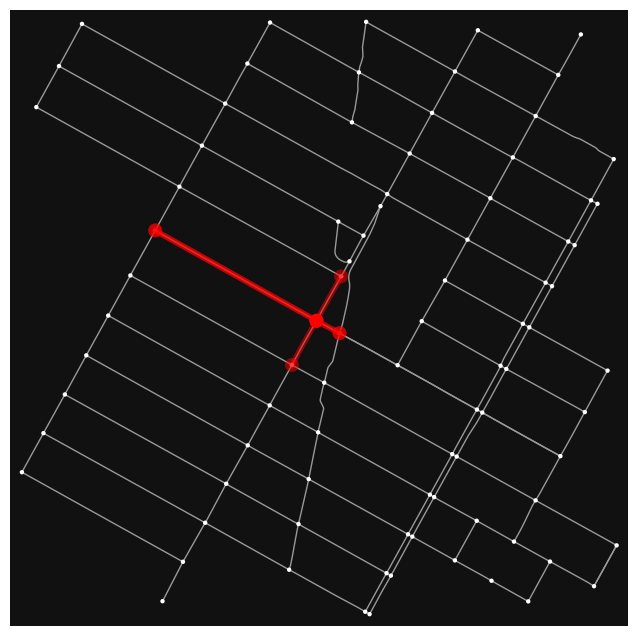

In [ ]:
routes = [[u,v] for u, v in routes if graph.has_edge(u,v)] + [[v, u] for u, v in routes if graph.has_edge(v, u)]
fig, ax = ox.plot.plot_graph_routes(graph, routes=routes, route_colors='red', route_linewidth=2, node_size=10)

In [ ]:
import folium
import time
from IPython.display import display, clear_output

In [ ]:
m = folium.Map(location=geo_coordinates, zoom_start=18)

In [ ]:
def add_traffic_lights(map, center, directions, radius=20,active=None):
  for i, bearing in enumerate(directions):
    angle_rad = math.radians(bearing)
    start_lat = center[0] + (radius/111320) * math.sin(angle_rad)
    start_lon = center[1] + (radius/(111320 * math.cos(math.radians(center[0])))) * math.cos(angle_rad)

    color = "green" if i == active else "red"
    folium.Circle(
        location=(start_lat, start_lon),
        radius=5,
        fill=True,
        fill_color=color,
    ).add_to(map)

In [ ]:
add_traffic_lights(m, geo_coordinates, directions, active=0)
m

In [ ]:
cycles = 10
interval = 1
for cycle in range(cycles):
  active_lane = cycle % len(directions)
  map = folium.Map(location=geo_coordinates, zoom_start=18)
  add_traffic_lights(map, geo_coordinates, directions, active=active_lane)
  clear_output(wait=True)
  display(map)
  time.sleep(interval)